In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib 
import matplotlib.pyplot as plt 
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/project-1-2d-ising-model/2d_Ising.pickle
/kaggle/input/project-1-2d-ising-model/readme.txt


In [2]:
import random
from matplotlib.colors import ListedColormap

# Load Data: 2-D Ising Model
Classical 2d Ising (system size = 10*10, periodic boundary condition)

100 ensembles for each temperature

In [3]:
import pickle 
with open('../input/project-1-2d-ising-model/2d_Ising.pickle', 'rb') as f:
    data = pickle.load(f)

In [4]:
data

{'x_data': array([[[[ 1.,  1.,  1., ...,  1.,  1.,  1.],
          [ 1.,  1.,  1., ...,  1.,  1.,  1.],
          [ 1.,  1.,  1., ...,  1.,  1.,  1.],
          ...,
          [ 1.,  1.,  1., ...,  1.,  1.,  1.],
          [ 1.,  1.,  1., ...,  1.,  1.,  1.],
          [ 1.,  1.,  1., ...,  1.,  1.,  1.]],
 
         [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
          [ 1.,  1.,  1., ...,  1.,  1.,  1.],
          [ 1.,  1.,  1., ...,  1.,  1.,  1.],
          ...,
          [ 1.,  1.,  1., ...,  1.,  1.,  1.],
          [ 1.,  1.,  1., ...,  1.,  1.,  1.],
          [ 1.,  1.,  1., ...,  1.,  1.,  1.]],
 
         [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
          [ 1.,  1.,  1., ...,  1.,  1.,  1.],
          [ 1.,  1.,  1., ...,  1.,  1.,  1.],
          ...,
          [ 1.,  1.,  1., ...,  1.,  1.,  1.],
          [ 1.,  1.,  1., ...,  1.,  1.,  1.],
          [ 1.,  1.,  1., ...,  1.,  1.,  1.]],
 
         ...,
 
         [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
          [ 1.,  1.,  1., .

# 處理**spin**的資料

In [5]:
spin = data['x_data']
type(spin)
print('Shape of Spin Date', spin.shape)
np.save("spin",spin)

Shape of Spin Date (1001, 100, 10, 10)


No. 423 No 16


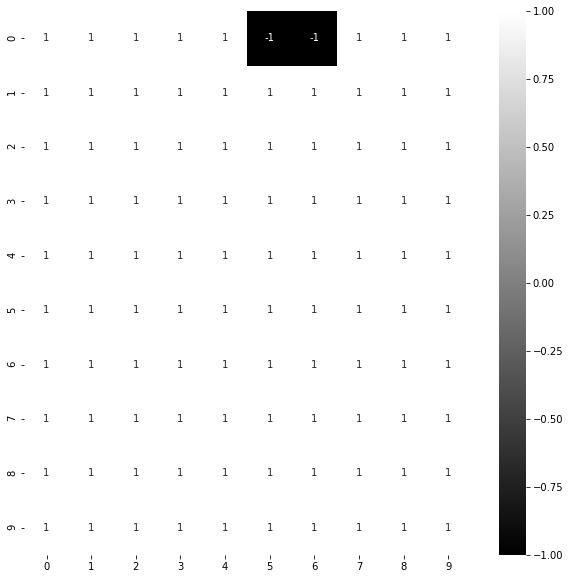

In [6]:
a = random.randint(0, 1000)
b = random.randint(0, 100)
print('No.',a, 'No', b)

plt.figure( figsize = (10,10))
sns.heatmap(spin[a,b], cmap = 'gray', annot = True)
plt.show()

No. 426 No 10


<Figure size 720x720 with 0 Axes>

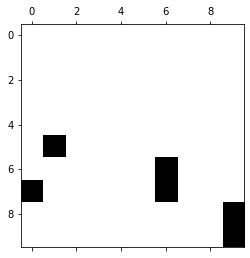

In [7]:
a = random.randint(0, 1000)
b = random.randint(0, 100)
print('No.',a, 'No', b)

fig = plt.figure( figsize = (10,10))
plt.matshow(spin[a,b], cmap = 'gray')
plt.show()

In [8]:
temperature = data["Temperature"]

In [9]:
ydata = data['y_data']
type(ydata)
ydata.shape
np.save('ydata', ydata)

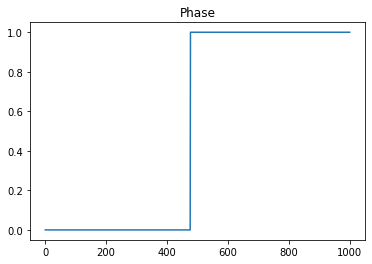

In [10]:
phase = ydata.T[0]
#print(phase)
plt.figure()
plt.title('Phase')
plt.plot(phase)
plt.show()


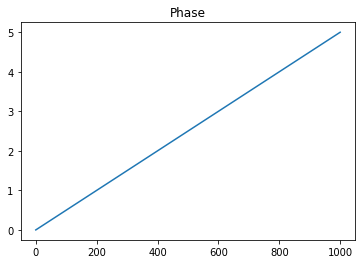

In [11]:
phase = ydata.T[0]
#print(phase)
plt.figure()
plt.title('Phase')
plt.plot(temperature)
plt.show()

# Caluculate the average value of each configuration. 
We have 100 configurations at a given temperature. And the scale of temperature is from 0 to 5.

In [12]:
mag = np.zeros(shape = (1001, 100))

# 計算每一張圖的平均
for i in range(1001):
    for j in range(100):
        mag[i][j] = np.average(spin[i][j]) 

# 計算每一個溫度點的平均
mag_1 = np.zeros(1001)
for i in range(1001):
    mag_1[i] = np.average(mag[i])
    
# 取絕對值
mag_2 = np.abs(mag_1)

In [13]:
mt = np.concatenate([[temperature.T], [mag_2.T]]).T

In [14]:
mt.shape

(1001, 2)

# Figure and Behaviour
From the figure below, we can obviuosly find there are two stable zones. One is near to 0K, and another is about 5K. In the middle range, the figure seems exsiting dramastic change. It is where the phase transition happen.

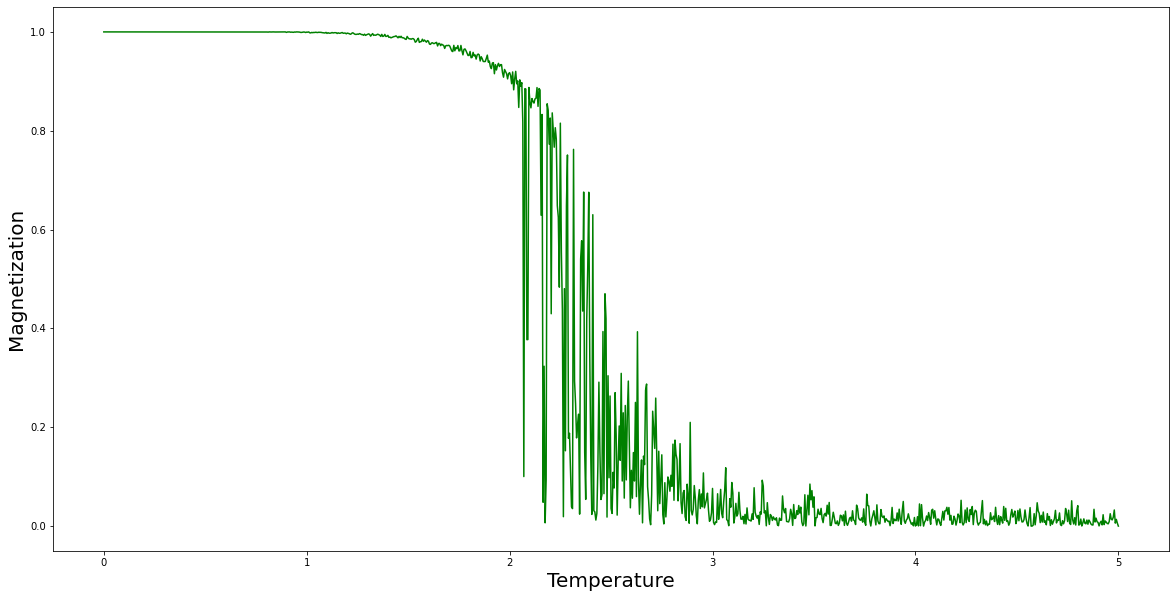

In [15]:
plt.figure(figsize = (20, 10))
plt.plot(temperature, mag_2, c = 'green')
plt.xlabel('Temperature', fontsize = 20)
plt.ylabel('Magnetization', fontsize = 20)
plt.show()